In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
#Load Data
df = pd.read_csv(r"C:\Users\swati\Desktop\Netflix_dashboard\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Data Cleaning
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['listed_in'] = df['listed_in'].fillna('Unknown')


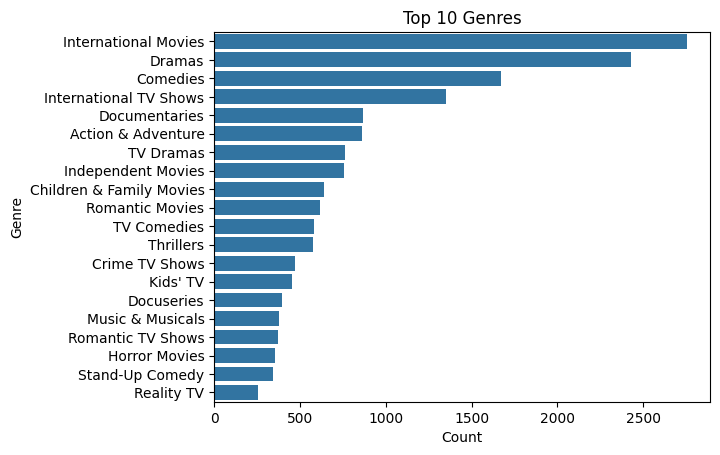

In [8]:
#most frequent genres
from collections import Counter

genre_list = []
for genres in df['listed_in']:
    for g in genres.split(','):
        genre_list.append(g.strip())

genre_freq = Counter(genre_list)
genre_df = pd.DataFrame(genre_freq.items(), columns=["Genre", "Count"])
genre_df = genre_df.sort_values(by="Count", ascending=False)

sns.barplot(data=genre_df.head(20), x='Count', y='Genre')
plt.title("Top 10 Genres")
plt.show()


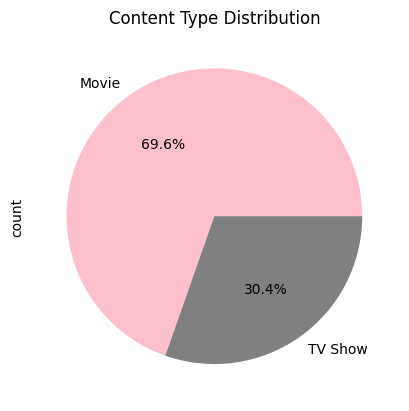

In [14]:
#type of content
colors = ['pink', 'gray']
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors)
plt.title("Content Type Distribution")
plt.show()


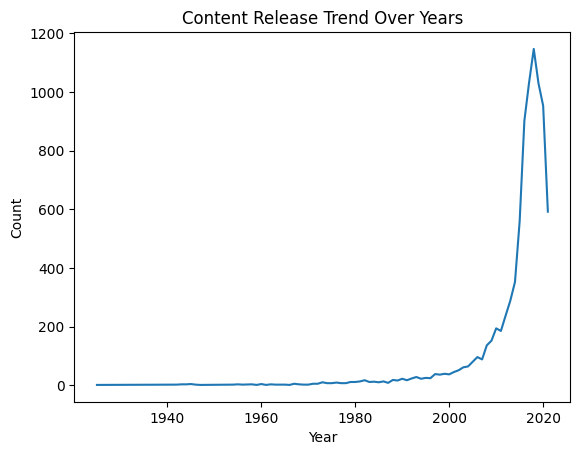

In [16]:
#Year-wise Release Trend
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Content Release Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


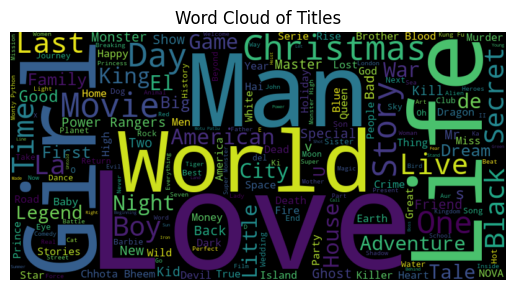

In [21]:
text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Titles")
plt.show()
